<a href="https://colab.research.google.com/github/skillnerve/DataScience-Projects/blob/main/Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import VarianceThreshold
from xgboost import XGBRegressor
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from datetime import datetime
from dateutil.relativedelta import relativedelta
import re
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,Activation,Conv1D,Concatenate,MaxPooling1D,Dropout,Flatten,Embedding,LSTM,BatchNormalization
from tensorflow.keras.models import Model
import tensorflow.keras as keras
from tqdm import tqdm
from prettytable import PrettyTable
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import unidecode
from sklearn.preprocessing import OneHotEncoder

**Mounting**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data**

In [5]:
train_data=pd.read_csv('/content/drive/MyDrive/commonlitreadabilityprize (1)/train.csv')

In [6]:
test_data=pd.read_csv('/content/drive/MyDrive/commonlitreadabilityprize (1)/test.csv')

In [7]:
train_data.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


**PreProcessing**

As standard_error is absent in test data ....

In [8]:
train_data=train_data.drop('standard_error',axis=1)

In [9]:
print(set(train_data['url_legal']))

{nan, 'https://kids.frontiersin.org/article/10.3389/frym.2020.00038', 'https://simple.wikipedia.org/wiki/Irrigation', 'https://simple.wikipedia.org/wiki/Physics', 'https://en.wikipedia.org/wiki/Mineral', 'https://kids.frontiersin.org/article/10.3389/frym.2020.00015', 'https://en.wikipedia.org/wiki/Electric_charge', 'https://simple.wikipedia.org/wiki/Computer_program', 'https://simple.wikipedia.org/wiki/Cuneiform', 'https://kids.frontiersin.org/article/10.3389/frym.2018.00047', 'https://kids.frontiersin.org/article/10.3389/frym.2020.00058', 'https://freekidsbooks.org/wp-content/uploads/2020/06/have-you-ever-heard-a-whale-sing-Pratham-FKB.pdf', 'https://simple.wikipedia.org/wiki/Protein', 'https://kids.frontiersin.org/article/10.3389/frym.2019.00122', 'https://simple.wikipedia.org/wiki/Vaccine', 'https://simple.wikipedia.org/wiki/Electromagnet', 'https://www.digitallibrary.io/en/books/details/1378', 'https://en.wikipedia.org/wiki/Treaty_of_Ghent', 'https://kids.frontiersin.org/article/10

From Url we can extract:
   
   - Site Name
   - Topic Name

In [10]:
def extract_from_link(train_data):
  train_data['url_legal']=train_data['url_legal'].fillna('0')
  train_data['site'] ='-1'
  train_data['pre']  ='-1'
  train_data['post'] ='-1'
  train_data['posts']='-1'
  train_data['type'] ='-1'
  train_data['topic'] ='-1'
  for i in range(train_data.shape[0]):
    if train_data['url_legal'].iloc[i]!='0':
      arr=train_data['url_legal'].iloc[i].split('/')[2].split('.')
      if len(arr)==2:
        train_data['site'].iloc[i] =arr[0]
        train_data['pre'].iloc[i]  ='0'
        train_data['post'].iloc[i] =arr[1]
        train_data['posts'].iloc[i]='0'
      if len(arr)==3:
        train_data['site'].iloc[i] =arr[1]
        train_data['pre'].iloc[i]  =arr[0]
        train_data['post'].iloc[i] =arr[2]
        train_data['posts'].iloc[i]='0'
      if len(arr)>=4:
        train_data['site'].iloc[i] =arr[1]
        train_data['pre'].iloc[i]  =arr[0]
        train_data['post'].iloc[i] =arr[2]
        train_data['posts'].iloc[i]=arr[3]
      try:
        train_data['type'].iloc[i]=train_data['url_legal'].iloc[i].split('/')[3]
      except:
        pass
      try:
        try:
          k=int(train_data['url_legal'].iloc[i].split('/')[4])
          train_data['topic'].iloc[i]='itsnum'
        except:
          train_data['topic'].iloc[i]=train_data['url_legal'].iloc[i].split('/')[4]
      except:
        pass
      try:
        try:
          k=int(train_data['url_legal'].iloc[i].split('/')[5])
          if train_data['topic'].iloc[i]=='itsnum':
            train_data['topic'].iloc[i]='itsnum'
        except:
          train_data['topic'].iloc[i]=train_data['url_legal'].iloc[i].split('/')[5]
      except:
        pass
      try:
        try:
          k=int(train_data['url_legal'].iloc[i].split('/')[6])
          if train_data['topic'].iloc[i]=='itsnum':
            train_data['topic'].iloc[i]='itsnum'
        except:
          train_data['topic'].iloc[i]=train_data['url_legal'].iloc[i].split('/')[6]
      except:
        pass
      try:
        try:
          k=int(train_data['url_legal'].iloc[i].split('/')[7])
          if train_data['topic'].iloc[i]=='itsnum':
            train_data['topic'].iloc[i]='itsnum'
        except:
          train_data['topic'].iloc[i]=train_data['url_legal'].iloc[i].split('/')[7].split('.')[0]
      except:
        pass
  for i in range(train_data.shape[0]):
    try:
      train_data['topic'].iloc[i]=re.sub('[().0123456789#~:,]','',train_data['topic'].iloc[i]).lower()
      train_data['topic'].iloc[i]=re.sub('[-_=%]',' ',train_data['topic'].iloc[i]).lower()
    except:
      pass
  train_data=train_data.drop(['url_legal','license'],axis=1)
  return(train_data)

In [11]:
train_data=extract_from_link(train_data)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [12]:
train_data.tail(2)

,id,excerpt,target,site,pre,post,posts,type,topic
2832,15e2e9e7a,Solids are shapes that you can actually touch....,-0.215279,wikibooks,en,org,0,wiki,solids
2833,5b990ba77,Animals are made of many cells. They eat thing...,0.300779,wikibooks,en,org,0,wiki,animals


In [13]:
enc = OneHotEncoder()
enc.fit(train_data[['site','pre','post','posts','type']])
array_of_labels=np.array(enc.transform(train_data[['site','pre','post','posts','type']]).toarray())
array_names=enc.get_feature_names(['site','pre','post','posts','type'])
for i in range(len(array_names)):
  train_data[array_names[i]]=array_of_labels[:,i]

In [14]:
train_data.tail(2)

,id,excerpt,target,site,pre,post,posts,type,topic,site_-1,site_africanstorybook,site_ck12,site_co,site_commonlit,site_digitallibrary,site_ehe,site_freekidsbooks,site_frontiersin,site_google,site_uen,site_wikibooks,site_wikipedia,pre_-1,pre_0,pre_beyondpenguins,pre_drive,pre_emedia,pre_en,pre_kids,pre_simple,pre_sites,pre_static,pre_ukuqonda,pre_www,post_-1,post_com,post_io,post_org,post_osu,post_za,posts_-1,posts_0,posts_edu,type_,type_#,type_-1,type_article,type_beyondpenguins,type_book,type_courses,type_digicom,type_en,type_file,type_issue,type_sites,type_texts,type_wiki,type_wp-content
2832,15e2e9e7a,Solids are shapes that you can actually touch....,-0.215279,wikibooks,en,org,0,wiki,solids,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2833,5b990ba77,Animals are made of many cells. They eat thing...,0.300779,wikibooks,en,org,0,wiki,animals,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
train_data=train_data.drop(['site','pre','post','posts','type'],axis=1)

In [16]:
train_data_now=train_data.drop('id',axis=1)

In [17]:
train_data_now.tail()

,excerpt,target,topic,site_-1,site_africanstorybook,site_ck12,site_co,site_commonlit,site_digitallibrary,site_ehe,site_freekidsbooks,site_frontiersin,site_google,site_uen,site_wikibooks,site_wikipedia,pre_-1,pre_0,pre_beyondpenguins,pre_drive,pre_emedia,pre_en,pre_kids,pre_simple,pre_sites,pre_static,pre_ukuqonda,pre_www,post_-1,post_com,post_io,post_org,post_osu,post_za,posts_-1,posts_0,posts_edu,type_,type_#,type_-1,type_article,type_beyondpenguins,type_book,type_courses,type_digicom,type_en,type_file,type_issue,type_sites,type_texts,type_wiki,type_wp-content
2829,When you think of dinosaurs and where they liv...,1.711390,dinosaurs text,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2830,So what is a solid? Solids are usually hard be...,0.189476,solids,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2831,The second state of matter we will discuss is ...,0.255209,liquids,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2832,Solids are shapes that you can actually touch....,-0.215279,solids,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2833,Animals are made of many cells. They eat thing...,0.300779,animals,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
def decontracted(phrase):
  # specific
  phrase = re.sub(r"won't", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)
  # general
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)
  phrase=re.sub(':',' ',phrase)
  phrase=re.sub(',',' ',phrase)
  phrase=re.sub(';',' ',phrase)
  phrase=re.sub('\"',' ',phrase)
  phrase=re.sub('\"\"',' ',phrase)
  phrase=re.sub('\(',' ',phrase)
  phrase=re.sub('\)',' ',phrase)
  phrase=re.sub('=',' ',phrase)
  phrase=re.sub('\+',' ',phrase)
  phrase=re.sub('\~',' ',phrase)
  phrase=re.sub('\*',' ',phrase)
  phrase=re.sub('\%',' ',phrase)
  phrase=re.sub('\÷',' ',phrase)
  phrase=re.sub('‘',' ',phrase)
  phrase=re.sub('\/',' ',phrase)
  phrase=re.sub('\'',' ',phrase)
  phrase=re.sub('\?',' ',phrase)
  phrase=re.sub('!',' ',phrase)
  phrase=re.sub('-',' ',phrase)
  phrase=re.sub('_',' ',phrase)
  phrase=re.sub('–',' ',phrase)
  phrase=re.sub('—',' ',phrase)
  phrase=re.sub('\.',' ',phrase)
  phrase=re.sub('\[',' ',phrase)
  phrase=re.sub('\]',' ',phrase)
  phrase=re.sub('[0-9]',' ',phrase)
  phrase=re.sub('\<',' ',phrase)
  phrase=re.sub('\&',' ',phrase)
  phrase=re.sub('\$',' ',phrase)
  phrase=re.sub('\"bottom','bottom',phrase)
  phrase=phrase.split(' ')
  while '' in phrase:
    phrase.remove('')
  k=[]
  for i in phrase:
    k.append(unidecode.unidecode(i))
  return(' '.join(k).lower())

In [19]:
for i in range(train_data_now.shape[0]):
  train_data_now['excerpt'].iloc[i]=decontracted(train_data_now['excerpt'].iloc[i])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [20]:
from collections import Counter
from sklearn.preprocessing import normalize
import math
def Fit(corpus):
    UniqueWords=set()
    for sentences in corpus:
        for words in sentences.split():
            UniqueWords.add(words)
    UniqueWords=sorted(list(UniqueWords))
    print(len(UniqueWords))
    print(UniqueWords)
    return(UniqueWords)
def IDF(corpus):
    UniqueWords=Fit(corpus)
    IDF_Matrix=dict()
    for i in tqdm(UniqueWords):
        count=0
        for j in corpus:
            if i in j.split():
                count+=1
        IDF_Matrix[i]=1+math.log(((1+len(corpus))/(1+count)))
    return(IDF_Matrix)
def TFIDF(corpus):
    IDF_Matrix=IDF(corpus)
    MatColumn=[]
    for sentence in tqdm(corpus):
        MatRow=[]
        Row=dict(Counter(sentence.split()))
        for UniqueWord in list(IDF_Matrix.keys()):
            tfidf=0
            for word,freq in Row.items():            
                if UniqueWord==word:
                    tfidf=(freq/len(sentence.split()))*(IDF_Matrix[word])
            if tfidf!=0:
              MatRow.append(tfidf)
        MatColumn.append(MatRow)
    return(MatColumn)
corpus =TFIDF(train_data_now['excerpt'])

  0%|          | 3/26263 [00:00<14:43, 29.74it/s]

26263
['"bottom', '...', '1/2', '1/4', 'a', 'aa', 'aaauuuu', 'aah', 'aai', 'aaminah', 'aaron', 'aback', 'abagnale', 'abandon', 'abandoned', 'abandonment', 'abated', 'abbey', 'abbot', 'abbreviate', 'abbreviated', 'abbreviation', 'abc', 'abdomen', 'abe', 'abebe', 'abel', 'aberdonian', 'aberration', 'aberrations', 'abhor', 'abhorrence', 'abide', 'abides', 'abiding', 'abigail', 'abike', 'abilities', 'ability', 'abiogenic', 'abiotic', 'abject', 'ablation', 'ablaze', 'able', 'ablutions', 'ably', 'abnormal', 'aboard', 'abode', 'abolished', 'abolition', 'abortive', 'abound', 'abounded', 'abounds', 'about', 'above', 'abrade', 'abrahamic', 'abreast', 'abroad', 'abrupt', 'abruptly', 'absence', 'absent', 'absentees', 'absolute', 'absolutely', 'absolutism', 'absorb', 'absorbed', 'absorbing', 'absorbs', 'absorption', 'abstain', 'abstained', 'abstention', 'abstract', 'abstracted', 'abstraction', 'abstractions', 'absurd', 'absurdity', 'absurdly', 'abu', 'abuja', 'abula', 'abundance', 'abundant', 'abun

100%|██████████| 2834/2834 [07:40<00:00,  6.15it/s]


In [21]:
a=[]
for i in corpus:
    for j in i:
        a.append(j)

Threshold 10

In [20]:
thresh1=sorted(a)[int(len(a)*10/100)]
c=0
for i in a:
  if i<=thresh1:
    c+=1
print(c)
thresh2=sorted(a)[int(len(a)*20/100)]
c=0
for i in a:
  if i<=thresh2:
    c+=1
print(c)
thresh3=sorted(a)[int(len(a)*30/100)]
c=0
for i in a:
  if i<=thresh3:
    c+=1
print(c)
thresh4=sorted(a)[int(len(a)*40/100)]
c=0
for i in a:
  if i<=thresh4:
    c+=1
print(c)
thresh5=sorted(a)[int(len(a)*50/100)]
c=0
for i in a:
  if i<=thresh5:
    c+=1
print(c)
thresh6=sorted(a)[int(len(a)*60/100)]
c=0
for i in a:
  if i<=thresh6:
    c+=1
print(c)
thresh7=sorted(a)[int(len(a)*70/100)]
c=0
for i in a:
  if i<=thresh7:
    c+=1
print(c)
thresh8=sorted(a)[int(len(a)*80/100)]
c=0
for i in a:
  if i<=thresh8:
    c+=1
print(c)
thresh9=sorted(a)[int(len(a)*90/100)]
c=0
for i in a:
  if i<=thresh9:
    c+=1
print(c)

29755
59496
89239
118995
148736
178489
208270
238123
267717


In [21]:
train_data_now['10']=0
train_data_now['20']=0
train_data_now['30']=0
train_data_now['40']=0
train_data_now['50']=0
train_data_now['60']=0
train_data_now['70']=0
train_data_now['80']=0
train_data_now['90']=0
train_data_now['100']=0
for i in range(train_data_now.shape[0]):
    for j in corpus[i]:
        if j<=thresh1:
            train_data_now['10'].iloc[i]+=1/len(train_data_now['excerpt'].iloc[i])
        elif j<=thresh2:
            train_data_now['20'].iloc[i]+=1/len(train_data_now['excerpt'].iloc[i])
        elif j<=thresh3:
            train_data_now['30'].iloc[i]+=1/len(train_data_now['excerpt'].iloc[i])
        elif j<=thresh4:
            train_data_now['40'].iloc[i]+=1/len(train_data_now['excerpt'].iloc[i])
        elif j<=thresh5:
            train_data_now['50'].iloc[i]+=1/len(train_data_now['excerpt'].iloc[i])
        elif j<=thresh6:
            train_data_now['60'].iloc[i]+=1/len(train_data_now['excerpt'].iloc[i])
        elif j<=thresh7:
            train_data_now['70'].iloc[i]+=1/len(train_data_now['excerpt'].iloc[i])
        elif j<=thresh8:
            train_data_now['80'].iloc[i]+=1/len(train_data_now['excerpt'].iloc[i])
        elif j<=thresh9:
            train_data_now['90'].iloc[i]+=1/len(train_data_now['excerpt'].iloc[i])
        else:
            train_data_now['100'].iloc[i]+=1/len(train_data_now['excerpt'].iloc[i])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [24]:
train_data_now.columns

Index(['excerpt', 'target', 'topic', 'site_-1', 'site_africanstorybook',
       'site_ck12', 'site_co', 'site_commonlit', 'site_digitallibrary',
       'site_ehe', 'site_freekidsbooks', 'site_frontiersin', 'site_google',
       'site_uen', 'site_wikibooks', 'site_wikipedia', 'pre_-1', 'pre_0',
       'pre_beyondpenguins', 'pre_drive', 'pre_emedia', 'pre_en', 'pre_kids',
       'pre_simple', 'pre_sites', 'pre_static', 'pre_ukuqonda', 'pre_www',
       'post_-1', 'post_com', 'post_io', 'post_org', 'post_osu', 'post_za',
       'posts_-1', 'posts_0', 'posts_edu', 'type_', 'type_#', 'type_-1',
       'type_article', 'type_beyondpenguins', 'type_book', 'type_courses',
       'type_digicom', 'type_en', 'type_file', 'type_issue', 'type_sites',
       'type_texts', 'type_wiki', 'type_wp-content', '10', '20', '30', '40',
       '50', '60', '70', '80', '90', '100', '15', '25', '35', '45', '55', '65',
       '75', '85', '95', '5'],
      dtype='object')

In [25]:
def remove_stopwords(train_data_now):
  stopwords= ['students','need','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
                "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
                'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
                'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
                'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
                'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
                'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
                'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
                'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
                'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
                's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
                've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
                "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
                "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
                'won', "won't", 'wouldn', "wouldn't"]
  for i in range(train_data_now.shape[0]):
    ans=[]
    if train_data_now['topic'].iloc[i]!=-1:
      for j in train_data_now['topic'].iloc[i]:
        if j in stopwords:
          pass
        else:
          ans.append(j)
      c=0
      for k in range(len(ans)):
        c+=train_data_now['excerpt'].iloc[i].count(ans[k])
      train_data_now['topic'].iloc[i]=c/(len(ans)+1)
  train_data_now['len']=0
  for i in range(train_data_now.shape[0]):
    train_data_now['len'].iloc[i]=len(train_data_now['excerpt'].iloc[i])
  return(train_data_now)

In [26]:
train_data_now=remove_stopwords(train_data_now)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


**Modeling**

In [27]:
train_data_now.tail(2)

,excerpt,target,topic,site_-1,site_africanstorybook,site_ck12,site_co,site_commonlit,site_digitallibrary,site_ehe,site_freekidsbooks,site_frontiersin,site_google,site_uen,site_wikibooks,site_wikipedia,pre_-1,pre_0,pre_beyondpenguins,pre_drive,pre_emedia,pre_en,pre_kids,pre_simple,pre_sites,pre_static,pre_ukuqonda,pre_www,post_-1,post_com,post_io,post_org,post_osu,post_za,posts_-1,posts_0,posts_edu,type_,type_#,type_-1,type_article,type_beyondpenguins,type_book,type_courses,type_digicom,type_en,type_file,type_issue,type_sites,type_texts,type_wiki,type_wp-content,10,20,30,40,50,60,70,80,90,100,15,25,35,45,55,65,75,85,95,5,len
2832,solids are shapes that you can actually touch ...,-0.215279,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.007143,0.008333,0.007143,0.004762,0.002381,0.009524,0.003571,0.010714,0.003571,0.011905,0.005952,0.004762,0.002381,0.002381,0.001190,0.008333,0.001190,0.004762,0.010714,0.003571,840
2833,animals are made of many cells they eat things...,0.300779,27.3333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.001183,0.002367,0.003550,0.005917,0.004734,0.007101,0.008284,0.003550,0.009467,0.008284,0.001183,0.007101,0.005917,0.003550,0.004734,0.002367,0.004734,0.004734,0.011834,0.002367,845


In [28]:
x_train, x_cv, y_train, y_cv = train_test_split(train_data_now.drop(['target','excerpt'],axis=1), train_data_now['target'], test_size=0.20, random_state=42)

In [29]:
x_train.shape

(2267, 71)

In [30]:
features=x_train.columns
ss=MinMaxScaler().fit(x_train)
x_train=pd.DataFrame(ss.transform(x_train),columns=features)
x_cv=pd.DataFrame(ss.transform(x_cv),columns=features)

In [31]:
class CustomCallBacks(keras.callbacks.Callback):
    
    def on_train_begin(self, logs={}):
        
        self.SaveModel=None
        
        self.x_train=x_train
        
        self.Y_train=y_train
                
        self.history={'mse':[]}
        
        self.historyV={'mse':[]}
        
        self.epoch=None
        
    def on_epoch_begin(self, epoch, logs=None):
        
        self.epoch=epoch
            
    def on_epoch_end(self, epoch, logs={}):
        
        self.history['mse'].append(logs.get('mean_squared_error'))
          
        if np.isnan(logs.get('loss')) or np.isinf(logs.get('loss')):

                print("Invalid loss and terminated at epoch {}".format(epoch))
          
                self.model.stop_training = True
        
        if len(self.history['mse'])>=2:
            
            if self.history['mse'][-1]<self.history['mse'][-2]:
            
                self.SaveModel=self.model
        
        else:
        
          self.SaveModel=self.model
    
    def on_test_begin(self, logs=None):
        
        self.validationX=x_cv
        
        self.validationY=y_cv
    
    def on_test_end(self, logs=None):
        
        self.historyV['mse'].append(logs.get('mean_squared_error'))
               
        if self.epoch>=3:
         
          if self.historyV['mse'][-2]<self.historyV['mse'][-1] :          
         
            lr=tf.keras.backend.get_value(self.model.optimizer.lr)
            
            tf.keras.backend.set_value(self.model.optimizer.lr,lr*0.90)
          else:
            self.SaveModel=model

In [32]:
cb=CustomCallBacks()

In [33]:
checkpoint_filepath = '/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='loss',
    mode='min',
    save_best_only=True)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 71)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 35)                2520      
_________________________________________________________________
dense_6 (Dense)              (None, 17)                612       
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 126       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 24        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 4         
Total params: 3,286
Trainable params: 3,286
Non-trainable params: 0
_________________________________________________________

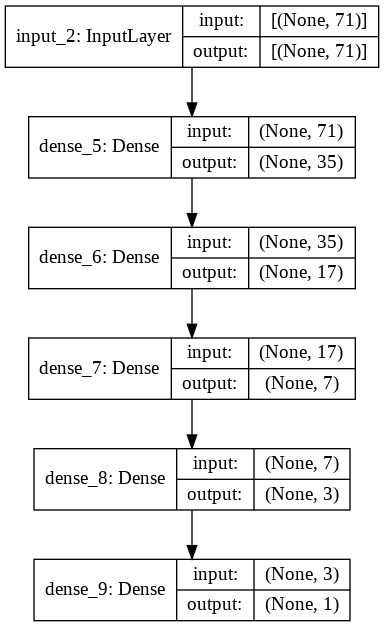

In [35]:
# kernel_regularizer='L2'
input_path1= Input(shape=(71))
dense1  =Dense(35,activation='relu',kernel_initializer='he_uniform',kernel_regularizer='L2')(input_path1)
dense2  =Dense(17,activation='relu',kernel_initializer='he_uniform')(dense1)
dense3  =Dense(7,activation='relu',kernel_initializer='he_uniform')(dense2)
dense4  =Dense(3,activation='relu',kernel_initializer='he_uniform')(dense3)
Output =Dense(1,activation='linear')(dense4)

model= Model(inputs=input_path1,outputs=Output)

model.summary()
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [36]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error',optimizer=opt,metrics=['mean_squared_error'])
logdir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")

In [37]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
model.fit(x_train,y_train,validation_data=(x_cv,y_cv),batch_size=1,epochs=100,callbacks=[tensorboard_callback,cb])

Epoch 1/100
2267/2267 [==============================] - 4s 2ms/step - loss: 1.0289 - mean_squared_error: 0.7882 - val_loss: 1.1016 - val_mean_squared_error: 0.9446
Epoch 2/100
2267/2267 [==============================] - 3s 1ms/step - loss: 0.8176 - mean_squared_error: 0.6934 - val_loss: 0.6976 - val_mean_squared_error: 0.5950
Epoch 3/100
2267/2267 [==============================] - 3s 2ms/step - loss: 0.7653 - mean_squared_error: 0.6765 - val_loss: 0.8532 - val_mean_squared_error: 0.7747
Epoch 4/100
2267/2267 [==============================] - 3s 1ms/step - loss: 0.7463 - mean_squared_error: 0.6736 - val_loss: 0.6675 - val_mean_squared_error: 0.6006
Epoch 5/100
2267/2267 [==============================] - 3s 2ms/step - loss: 0.7309 - mean_squared_error: 0.6673 - val_loss: 0.6962 - val_mean_squared_error: 0.6352
Epoch 6/100
2267/2267 [==============================] - 4s 2ms/step - loss: 0.7049 - mean_squared_error: 0.6481 - val_loss: 0.8202 - val_mean_squared_error: 0.7681
Epoch 7/10

In [35]:
print(mean_squared_error(y_cv,model.predict(x_cv).flatten()))

0.5813406135065949


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


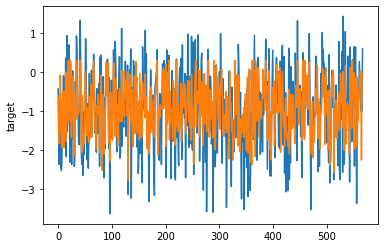

In [36]:
sns.lineplot(np.arange(len(y_cv)),y_cv)
sns.lineplot(np.arange(len(y_cv)),model.predict(x_cv).flatten())

In [37]:
model.load_weights(checkpoint_filepath)

ValueError: ignored

In [ ]:
model.compile(loss='mean_squared_error',optimizer=opt,metrics=['mean_squared_error'])

In [ ]:
print(model.evaluate(x_cv,y_cv))

In [38]:
test_data=extract_from_link(test_data)
enc.transform(test_data[['site','pre','post','posts','type']])
array_of_labels=np.array(enc.transform(test_data[['site','pre','post','posts','type']]).toarray())
array_names=enc.get_feature_names(['site','pre','post','posts','type'])
for i in range(len(array_names)):
  test_data[array_names[i]]=array_of_labels[:,i]
test_data=test_data.drop(['site','pre','post','posts','type'],axis=1)
test_data_now=test_data.drop('id',axis=1)
for i in range(test_data_now.shape[0]):
  test_data_now['excerpt'].iloc[i]=decontracted(test_data_now['excerpt'].iloc[i])
corpus =TFIDF(test_data_now['excerpt'])
test_data_now['10']=0
test_data_now['20']=0
test_data_now['30']=0
test_data_now['40']=0
test_data_now['50']=0
test_data_now['60']=0
test_data_now['70']=0
test_data_now['80']=0
test_data_now['90']=0
test_data_now['100']=0
for i in range(test_data_now.shape[0]):
  for j in corpus[i]:
    if j<=thresh1:
      test_data_now['10'].iloc[i]+=1/len(test_data_now['excerpt'].iloc[i])
    elif j<=thresh2:
      test_data_now['20'].iloc[i]+=1/len(test_data_now['excerpt'].iloc[i])
    elif j<=thresh3:
      test_data_now['30'].iloc[i]+=1/len(test_data_now['excerpt'].iloc[i])
    elif j<=thresh4:
      test_data_now['40'].iloc[i]+=1/len(test_data_now['excerpt'].iloc[i])
    elif j<=thresh5:
      test_data_now['50'].iloc[i]+=1/len(test_data_now['excerpt'].iloc[i])
    elif j<=thresh6:
      test_data_now['60'].iloc[i]+=1/len(test_data_now['excerpt'].iloc[i])
    elif j<=thresh7:
      test_data_now['70'].iloc[i]+=1/len(test_data_now['excerpt'].iloc[i])
    elif j<=thresh8:
      test_data_now['80'].iloc[i]+=1/len(test_data_now['excerpt'].iloc[i])
    elif j<=thresh9:
      test_data_now['90'].iloc[i]+=1/len(test_data_now['excerpt'].iloc[i])
    else:
      test_data_now['100'].iloc[i]+=1/len(test_data_now['excerpt'].iloc[i])
test_data_now=remove_stopwords(test_data_now)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
100%|██████████| 7/7 [00:00<00:00, 233.38it/s]


529
['a', 'about', 'account', 'acorn', 'active', 'activities', 'adam', 'adjacent', 'admiral', 'admire', 'aeronautics', 'afraid', 'after', 'ah', 'air', 'all', 'also', 'always', 'am', 'an', 'ancestor', 'and', 'another', 'anything', 'application', 'are', 'as', 'asking', 'aspects', 'associates', 'at', 'attitude', 'attributed', 'babe', 'back', 'bag', 'bath', 'be', 'beacon', 'beautiful', 'because', 'bed', 'been', 'before', 'beginning', 'behind', 'believed', 'bell', 'ben', 'best', 'big', 'binary', 'books', 'both', 'break', 'bright', 'brighter', 'bring', 'brother', 'bug', 'bugs', 'build', 'burning', 'but', 'by', 'can', 'captain', 'carefully', 'carries', 'case', 'cause', 'cell', 'cells', 'certain', 'changes', 'charlie', 'chat', 'cheerful', 'child', 'children', 'choices', 'chromatids', 'chromosomes', 'classes', 'classmates', 'clear', 'combination', 'common', 'compass', 'computer', 'computers', 'continued', 'control', 'correct', 'cottage', 'could', 'coupled', 'course', 'cups', 'cycle', 'cycles', 

In [40]:
test_data_now=test_data_now.drop('excerpt',axis=1)

In [41]:
y_pred=model.predict(pd.DataFrame(ss.transform(test_data_now),columns=features))

In [42]:
print(y_pred)

[[ 0.2974143 ]
 [ 0.2974143 ]
 [ 0.2974143 ]
 [-1.0020702 ]
 [-0.31486416]
 [ 0.2974143 ]
 [ 0.2974143 ]]


In [43]:
test_data['target']=y_pred

In [45]:
test_data[['id','target']].to_csv('take1.csv',index=False)

**LSTM**

In [ ]:
train_data=pd.read_csv('/content/drive/MyDrive/commonlitreadabilityprize (1)/train.csv')

In [ ]:
test_data=pd.read_csv('/content/drive/MyDrive/commonlitreadabilityprize (1)/test.csv')

In [ ]:
train_data['url_legal']=train_data['url_legal'].fillna(0)

In [ ]:
train_data['site'] =-1
train_data['pre']  =-1
train_data['post'] =-1
train_data['posts']=-1
train_data['type'] =-1
train_data['topic'] =-1
for i in range(train_data.shape[0]):
  if train_data['url_legal'].iloc[i]!=0:
    arr=train_data['url_legal'].iloc[i].split('/')[2].split('.')
    if len(arr)==2:
      train_data['site'].iloc[i] =arr[0]
      train_data['pre'].iloc[i]  =0
      train_data['post'].iloc[i] =arr[1]
      train_data['posts'].iloc[i]=0
    if len(arr)==3:
      train_data['site'].iloc[i] =arr[1]
      train_data['pre'].iloc[i]  =arr[0]
      train_data['post'].iloc[i] =arr[2]
      train_data['posts'].iloc[i]=0
    if len(arr)>=4:
      train_data['site'].iloc[i] =arr[1]
      train_data['pre'].iloc[i]  =arr[0]
      train_data['post'].iloc[i] =arr[2]
      train_data['posts'].iloc[i]=arr[3]
    try:
      train_data['type'].iloc[i]=train_data['url_legal'].iloc[i].split('/')[3]
    except:
      pass
    try:
      try:
        k=int(train_data['url_legal'].iloc[i].split('/')[4])
        train_data['topic'].iloc[i]='itsnum'
      except:
        train_data['topic'].iloc[i]=train_data['url_legal'].iloc[i].split('/')[4]
    except:
      pass
    try:
      try:
        k=int(train_data['url_legal'].iloc[i].split('/')[5])
        if train_data['topic'].iloc[i]=='itsnum':
          train_data['topic'].iloc[i]='itsnum'
      except:
        train_data['topic'].iloc[i]=train_data['url_legal'].iloc[i].split('/')[5]
    except:
      pass
    try:
      try:
        k=int(train_data['url_legal'].iloc[i].split('/')[6])
        if train_data['topic'].iloc[i]=='itsnum':
          train_data['topic'].iloc[i]='itsnum'
      except:
        train_data['topic'].iloc[i]=train_data['url_legal'].iloc[i].split('/')[6]
    except:
      pass
    try:
      try:
        k=int(train_data['url_legal'].iloc[i].split('/')[7])
        if train_data['topic'].iloc[i]=='itsnum':
          train_data['topic'].iloc[i]='itsnum'
      except:
        train_data['topic'].iloc[i]=train_data['url_legal'].iloc[i].split('/')[7].split('.')[0]
    except:
      pass

In [ ]:
for i in range(train_data.shape[0]):
  try:
    train_data['topic'].iloc[i]=re.sub('[().0123456789#~:,]','',train_data['topic'].iloc[i]).lower()
    train_data['topic'].iloc[i]=re.sub('[-_=%]',' ',train_data['topic'].iloc[i]).lower()
  except:
    pass

In [ ]:
train_data=train_data.drop(['url_legal','license'],axis=1)

In [ ]:
site=list(set(train_data['site']))
for i in range(len(site)):
  train_data.loc[train_data.site==site[i],'site']=i

In [ ]:
site=list(set(train_data['pre']))
for i in range(len(site)):
  train_data.loc[train_data.pre==site[i],'pre']=i

site=list(set(train_data['post']))
for i in range(len(site)):
  train_data.loc[train_data.post==site[i],'post']=i

site=list(set(train_data['posts']))
for i in range(len(site)):
  train_data.loc[train_data.posts==site[i],'posts']=i

site=list(set(train_data['type']))
for i in range(len(site)):
  train_data.loc[train_data.type==site[i],'type']=i

In [ ]:
train_data_now=train_data.drop('id',axis=1)

In [ ]:
# def decontracted(phrase):
#   # specific
#   phrase = re.sub(r"won't", "will not", phrase)
#   phrase = re.sub(r"can\'t", "can not", phrase)
#   # general
#   phrase = re.sub(r"n\'t", " not", phrase)
#   phrase = re.sub(r"\'re", " are", phrase)
#   phrase = re.sub(r"\'s", " is", phrase)
#   phrase = re.sub(r"\'d", " would", phrase)
#   phrase = re.sub(r"\'ll", " will", phrase)
#   phrase = re.sub(r"\'t", " not", phrase)
#   phrase = re.sub(r"\'ve", " have", phrase)
#   phrase = re.sub(r"\'m", " am", phrase)
#   phrase=re.sub(':',' ',phrase)
#   phrase=re.sub(',',' ',phrase)
#   phrase=re.sub(';',' ',phrase)
#   phrase=re.sub('\"',' ',phrase)
#   phrase=re.sub('[()]',' ',phrase)
#   phrase=re.sub('[=+%*~÷]',' ',phrase)
#   phrase=re.sub('‘',' ',phrase)
#   phrase=re.sub('/',' ',phrase)
#   phrase=re.sub('\'',' ',phrase)
#   phrase=re.sub('[?.!-_—–]',' ',phrase)
#   phrase=re.sub('[0-9]',' ',phrase)
#   phrase=phrase.split(' ')
#   while '' in phrase:
#     phrase.remove('')
#   return(' '.join(phrase).lower())

In [ ]:
for i in range(train_data_now.shape[0]):
  train_data_now['excerpt'].iloc[i]=decontracted(train_data_now['excerpt'].iloc[i])

In [ ]:
from collections import Counter
from sklearn.preprocessing import normalize
import math
def Fit(corpus):
    UniqueWords=set()
    for sentences in corpus:
        for words in sentences.split():
            UniqueWords.add(words)
    UniqueWords=sorted(list(UniqueWords))
    return(UniqueWords)
def IDF(corpus):
    UniqueWords=Fit(corpus)
    IDF_Matrix=dict()
    for i in tqdm(UniqueWords):
        count=0
        for j in corpus:
            if i in j.split():
                count+=1
        IDF_Matrix[i]=1+math.log(((1+len(corpus))/(1+count)))
    return(IDF_Matrix)
def TFIDF(corpus):
    IDF_Matrix=IDF(corpus)
    MatColumn=[]
    for sentence in tqdm(corpus):
        MatRow=[]
        Row=dict(Counter(sentence.split()))
        for UniqueWord in list(IDF_Matrix.keys()):
            tfidf=0
            for word,freq in Row.items():            
                if UniqueWord==word:
                    tfidf=(freq/len(sentence.split()))*(IDF_Matrix[word])
            if tfidf!=0:
              MatRow.append(tfidf)
        MatColumn.append(MatRow)
    return(MatColumn)
corpus =TFIDF(train_data_now['excerpt'])

In [ ]:
a=[]
for i in corpus:
    for j in i:
        a.append(j)
sns.histplot(a)

In [ ]:
thresh1=sorted(a)[int(len(a)*10/100)]
print(thresh1)
thresh2=sorted(a)[int(len(a)*20/100)]
print(thresh2)
thresh3=sorted(a)[int(len(a)*30/100)]
print(thresh3)
thresh4=sorted(a)[int(len(a)*40/100)]
print(thresh4)
thresh5=sorted(a)[int(len(a)*50/100)]
print(thresh5)
thresh6=sorted(a)[int(len(a)*60/100)]
print(thresh6)
thresh7=sorted(a)[int(len(a)*70/100)]
print(thresh7)
thresh8=sorted(a)[int(len(a)*80/100)]
print(thresh8)
thresh9=sorted(a)[int(len(a)*90/100)]
print(thresh9)

In [ ]:
train_data_now['10']=0
train_data_now['20']=0
train_data_now['30']=0
train_data_now['40']=0
train_data_now['50']=0
train_data_now['60']=0
train_data_now['70']=0
train_data_now['80']=0
train_data_now['90']=0
train_data_now['100']=0
for i in range(train_data_now.shape[0]):
  for j in corpus[i]:
    if j<=thresh1:
      train_data_now['10'].iloc[i]+=1/len(train_data_now['excerpt'].iloc[i])
    elif j<=thresh2:
      train_data_now['20'].iloc[i]+=1/len(train_data_now['excerpt'].iloc[i])
    elif j<=thresh3:
      train_data_now['30'].iloc[i]+=1/len(train_data_now['excerpt'].iloc[i])
    elif j<=thresh4:
      train_data_now['40'].iloc[i]+=1/len(train_data_now['excerpt'].iloc[i])
    elif j<=thresh5:
      train_data_now['50'].iloc[i]+=1/len(train_data_now['excerpt'].iloc[i])
    elif j<=thresh6:
      train_data_now['60'].iloc[i]+=1/len(train_data_now['excerpt'].iloc[i])
    elif j<=thresh7:
      train_data_now['70'].iloc[i]+=1/len(train_data_now['excerpt'].iloc[i])
    elif j<=thresh8:
      train_data_now['80'].iloc[i]+=1/len(train_data_now['excerpt'].iloc[i])
    elif j<=thresh9:
      train_data_now['90'].iloc[i]+=1/len(train_data_now['excerpt'].iloc[i])
    else:
      train_data_now['100'].iloc[i]+=1/len(train_data_now['excerpt'].iloc[i])

In [ ]:
train_data_now.head()

In [ ]:
for i in range(train_data_now.shape[0]):
  ans=[]
  if train_data_now['topic'].iloc[i]!=-1:
    for j in train_data_now['topic'].iloc[i]:
      if j in stopwords:
        pass
      else:
        ans.append(j)
    c=0
    for k in range(len(ans)):
      c+=train_data_now['excerpt'].iloc[i].count(ans[k])
    train_data_now['topic'].iloc[i]=c/(len(ans)+1)

In [ ]:
train_data_now['len']=0
for i in range(train_data_now.shape[0]):
  train_data_now['len'].iloc[i]=len(train_data_now['excerpt'].iloc[i])

In [ ]:
import re
GloVe_Vectors = dict()
f = open('/content/drive/MyDrive/glove.6B.300d.txt','r')
for line in f:
    values = line.split()
    word = values[0]
    encodes = np.asarray(values[1:], dtype='float32')
    GloVe_Vectors[word] = encodes

In [ ]:
tokenizer = Tokenizer(
    num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n_', lower=True,
    split=' ',)

In [ ]:
tokenizer.fit_on_texts(train_data_now['excerpt'])

In [ ]:
word_index1 = tokenizer.word_index

In [ ]:
sequences1 = tokenizer.texts_to_sequences(train_data_now['excerpt'])

In [ ]:
max(train_data_now['len'])

In [ ]:
Data1= pad_sequences(sequences1, maxlen=1293,padding='post')

In [ ]:
Embedding_matrix1=np.zeros((len(word_index1)+1,300))

In [ ]:
for words,index in tokenizer.word_index.items():
    if words in GloVe_Vectors:
        Embedding_matrix1[index]=GloVe_Vectors[words]

In [ ]:
embedding_layer1 = Embedding(len(word_index1) + 1,
                            300,
                            weights=[Embedding_matrix1],
                            input_length=1293,
                            trainable=False)

In [ ]:
Data1_train,Data1_cv,x_train, x_cv, y_train, y_cv=train_test_split(Data1,train_data_now.drop(['target','excerpt'],axis=1), train_data_now['target'],test_size=0.20)

In [ ]:
x_train.shape

In [ ]:
input_path1= Input(shape=(1293,))
em_path1= embedding_layer1(input_path1)
lstm=LSTM(4,return_sequences=True)(em_path1)
Dense1  = Dense(2,activation='relu',kernel_initializer='he_uniform')(lstm)
flatten1=Flatten()(Dense1)
Dense2  = Dense(20,activation='relu',kernel_initializer='he_uniform')(flatten1)

input_path2= Input(shape=(18))
Dense3  = Dense(9,activation='relu',kernel_initializer='he_uniform')(input_path2)
Dense4  = Dense(5,activation='relu',kernel_initializer='he_uniform')(Dense3)

layer1  = Concatenate(axis=-1)([Dense2,Dense4])
Dense5  = Dense(10,activation='relu',kernel_initializer='he_uniform')(layer1)
# DropOut1=Dropout(0.2,seed=10)(Dense2)
Dense6  = Dense(5,activation='relu',kernel_initializer='he_uniform')(Dense5)
# DropOut2=Dropout(0.2,seed=10)(Dense3)
Output  = Dense(1,activation='linear')(Dense6)

model3= Model(inputs=[input_path1,input_path2],outputs=Output)
dot_img_file = '/tmp/model_3.png'
tf.keras.utils.plot_model(model3, to_file=dot_img_file, show_shapes=True)


In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model3.compile(loss='mean_squared_error',optimizer=opt,metrics=['mean_squared_error'])
logdir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")

In [ ]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
model3.fit((Data1_train,np.array(x_train, dtype=np.float)),y_train,validation_data=((Data1_cv,np.array(x_cv, dtype=np.float)),y_cv),batch_size=1,epochs=2,callbacks=[tensorboard_callback,cb])

In [ ]:
test_data.head()
test_data['url_legal']=test_data['url_legal'].fillna(0)
test_data['site'] =-1
test_data['pre']  =-1
test_data['post'] =-1
test_data['posts']=-1
test_data['type'] =-1
test_data['topic'] =-1
for i in range(test_data.shape[0]):
  if test_data['url_legal'].iloc[i]!=0:
    arr=test_data['url_legal'].iloc[i].split('/')[2].split('.')
    if len(arr)==2:
      test_data['site'].iloc[i] =arr[0]
      test_data['pre'].iloc[i]  =0
      test_data['post'].iloc[i] =arr[1]
      test_data['posts'].iloc[i]=0
    if len(arr)==3:
      test_data['site'].iloc[i] =arr[1]
      test_data['pre'].iloc[i]  =arr[0]
      test_data['post'].iloc[i] =arr[2]
      test_data['posts'].iloc[i]=0
    if len(arr)>=4:
      test_data['site'].iloc[i] =arr[1]
      test_data['pre'].iloc[i]  =arr[0]
      test_data['post'].iloc[i] =arr[2]
      test_data['posts'].iloc[i]=arr[3]
    try:
      test_data['type'].iloc[i]=test_data['url_legal'].iloc[i].split('/')[3]
    except:
      pass
    try:
      try:
        k=int(test_data['url_legal'].iloc[i].split('/')[4])
        test_data['topic'].iloc[i]='itsnum'
      except:
        test_data['topic'].iloc[i]=test_data['url_legal'].iloc[i].split('/')[4]
    except:
      pass
    try:
      try:
        k=int(test_data['url_legal'].iloc[i].split('/')[5])
        if test_data['topic'].iloc[i]=='itsnum':
          test_data['topic'].iloc[i]='itsnum'
      except:
        test_data['topic'].iloc[i]=test_data['url_legal'].iloc[i].split('/')[5]
    except:
      pass
    try:
      try:
        k=int(test_data['url_legal'].iloc[i].split('/')[6])
        if test_data['topic'].iloc[i]=='itsnum':
          test_data['topic'].iloc[i]='itsnum'
      except:
        test_data['topic'].iloc[i]=test_data['url_legal'].iloc[i].split('/')[6]
    except:
      pass
    try:
      try:
        k=int(test_data['url_legal'].iloc[i].split('/')[7])
        if test_data['topic'].iloc[i]=='itsnum':
          test_data['topic'].iloc[i]='itsnum'
      except:
        test_data['topic'].iloc[i]=train_data['url_legal'].iloc[i].split('/')[7].split('.')[0]
    except:
      pass

for i in range(test_data.shape[0]):
  try:
    test_data['topic'].iloc[i]=re.sub('[().0123456789#~:,]','',test_data['topic'].iloc[i]).lower()
    test_data['topic'].iloc[i]=re.sub('[-_=%]',' ',test_data['topic'].iloc[i]).lower()
  except:
    pass
test_data=test_data.drop('url_legal',axis=1)
test_data=test_data.drop('license',axis=1)
site=list(set(test_data['site']))
for i in range(len(site)):
  test_data.loc[test_data.site==site[i],'site']=i
site=list(set(test_data['pre']))
for i in range(len(site)):
  test_data.loc[test_data.pre==site[i],'pre']=i

site=list(set(test_data['post']))
for i in range(len(site)):
  test_data.loc[test_data.post==site[i],'post']=i

site=list(set(test_data['posts']))
for i in range(len(site)):
  test_data.loc[test_data.posts==site[i],'posts']=i

site=list(set(test_data['type']))
for i in range(len(site)):
  test_data.loc[test_data.type==site[i],'type']=i
test_data_now=test_data.drop('id',axis=1)

In [ ]:
test_data.head()

In [ ]:
test_data_now

In [ ]:
corpus =TFIDF(test_data_now['excerpt'])

In [ ]:
test_data_now['10']=0
test_data_now['20']=0
test_data_now['30']=0
test_data_now['40']=0
test_data_now['50']=0
test_data_now['60']=0
test_data_now['70']=0
test_data_now['80']=0
test_data_now['90']=0
test_data_now['100']=0
for i in range(test_data_now.shape[0]):
    for j in corpus[i]:
        if j<=thresh1:
            test_data_now['10'].iloc[i]+=1/len(test_data_now['excerpt'].iloc[i])
        elif j<=thresh2:
            test_data_now['20'].iloc[i]+=1/len(test_data_now['excerpt'].iloc[i])
        elif j<=thresh3:
            test_data_now['30'].iloc[i]+=1/len(test_data_now['excerpt'].iloc[i])
        elif j<=thresh4:
            test_data_now['40'].iloc[i]+=1/len(test_data_now['excerpt'].iloc[i])
        elif j<=thresh5:
            test_data_now['50'].iloc[i]+=1/len(test_data_now['excerpt'].iloc[i])
        elif j<=thresh6:
            test_data_now['60'].iloc[i]+=1/len(test_data_now['excerpt'].iloc[i])
        elif j<=thresh7:
            test_data_now['70'].iloc[i]+=1/len(test_data_now['excerpt'].iloc[i])
        elif j<=thresh8:
            test_data_now['80'].iloc[i]+=1/len(test_data_now['excerpt'].iloc[i])
        elif j<=thresh9:
            test_data_now['90'].iloc[i]+=1/len(test_data_now['excerpt'].iloc[i])
        else:
            test_data_now['100'].iloc[i]+=1/len(test_data_now['excerpt'].iloc[i])

In [ ]:
for i in range(test_data_now.shape[0]):
  ans=[]
  if test_data_now['topic'].iloc[i]!=-1:
    for j in test_data_now['topic'].iloc[i]:
      if j in stopwords:
        pass
      else:
        ans.append(j)
    c=0
    for k in range(len(ans)):
      c+=test_data_now['excerpt'].iloc[i].count(ans[k])
    test_data_now['topic'].iloc[i]=c/(len(ans)+1)

In [ ]:
test_data_now['len']=0
for i in range(test_data_now.shape[0]):
  test_data_now['len'].iloc[i]=len(test_data_now['excerpt'].iloc[i])

In [ ]:
sequences1 = tokenizer.texts_to_sequences(test_data_now['excerpt'])

In [ ]:
Data1= pad_sequences(sequences1, maxlen=1293,padding='post')

In [ ]:
test_data_now=test_data_now.drop('excerpt',axis=1)

In [ ]:
test_data_now.columns

In [ ]:
x_train.columns

In [ ]:
model3.fit((Data1,np.array(test_data_now, dtype=np.float)))

In [ ]:
input_path1= Input(shape=(1293,))
em_path1= embedding_layer1(input_path1)
lstm=LSTM(4,return_sequences=True)(em_path1)
Dense1  = Dense(1,activation='relu',kernel_initializer='he_uniform')(lstm)
flatten1=Flatten()(Dense1)
Dense3  = Dense(100,activation='relu',kernel_initializer='he_uniform')(flatten1)
Dense4  = Dense(10,activation='relu',kernel_initializer='he_uniform')(Dense3)
Dense6  = Dense(5,activation='relu',kernel_initializer='he_uniform')(Dense4)
Output  = Dense(1,activation='linear')(Dense6)

model2= Model(inputs=[input_path1],outputs=Output)
dot_img_file = '/tmp/model_3.png'
tf.keras.utils.plot_model(model2, to_file=dot_img_file, show_shapes=True)


In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(loss='log_cosh',optimizer=opt,metrics=['mean_squared_error'])
logdir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")

In [ ]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
model2.fit(Data1_train,y_train,validation_data=(Data1_cv,y_cv),batch_size=1,epochs=30,callbacks=[tensorboard_callback])

In [ ]:
Data1_train

In [ ]:
y_train.isnull().any()